# folium

In [1]:
from folium.features import Icon

In [2]:
from folium.plugins import FastMarkerCluster

In [3]:
FastMarkerCluster??

# float barh

In [35]:
start

array([ 730122.,  730120.,  730123.])

In [52]:
def float_char_time_range(name_range):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    # y values
    names = list(name_range.keys())
    yval = list(range(len(names)))
    # x values
    start = mdates.date2num([name_range[k][0] for k in names])
    end = mdates.date2num([name_range[k][1] for k in names])
    width = end-start
    
    fig, ax = plt.subplots()
    ax.barh(bottom=yval, width=width, left=start, height=0.3)
    xfmt = mdates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    ax.yaxis.set_ticks([1,2,3])
    ax.yaxis.set_ticklabels(['a','b','c'])
    # autorotate the dates
    fig.autofmt_xdate()
    plt.show()

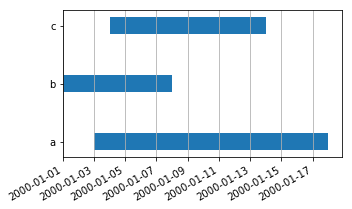

In [73]:
import datetime as DT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

start = [DT.datetime(2000,1,1)+DT.timedelta(days=i) for i in (2,0,3)]
end = [s+DT.timedelta(days=i) for s,i in zip(start, [15,7,10])]


start = mdates.date2num(start)
end = mdates.date2num(end)
yval = [1,2,3]
width = end-start

fig, ax = plt.subplots()
ax.barh(bottom=yval, width=width, left=start, height=0.3)
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.grid()
ax.yaxis.set_ticks([1,2,3])
ax.yaxis.set_ticklabels(['a','b','c'])
# autorotate the dates
fig.autofmt_xdate()
fig.set_size_inches(w=5, h=1*len(yval))
plt.show()

# quantile

In [1]:
l = [1]*10 + [2] * 8 + [3]*2 + [5]*3 + [8]+ [10]

In [2]:
import numpy as np

In [6]:
arr = np.array(l)
mi= arr.min()
ma = arr.max()

In [8]:
mi+4*(ma - mi)/5

8.1999999999999993

In [9]:
import pandas as pd

In [13]:
s = pd.Series(l).sort_values(ascending=False)

In [26]:
readable_idx

['>=8.20', '>=6.40', '>=4.60', '>=2.80', '>=1.00']

In [32]:
num = 5
mi = s.min()
ma = s.max()
iloc_idx = []
readable_idx = []
for i in range(num):
    thres = mi + (ma - mi) * (1-(i+1)/num)
    print(i, (1-(i+1)/num), thres,s[s>=thres].index[-1], (s>=thres).sum())
    iloc_idx.append((s>=thres).sum())
    readable_idx.append('score>=%.2f'%thres)

0 0.8 8.2 24 1
1 0.6 6.4 23 2
2 0.4 4.6 20 5
3 0.19999999999999996 2.8 18 7
4 0.0 1.0 0 25


In [33]:
s.iloc[:iloc_idx[0]]

24    10
dtype: int64

# function

In [27]:
def a(i, j=1, k=2, h=3):
    print(i, j, k, h)

In [31]:
a(1)
a(1, 2)
a(1, **{'j': 88}, k=1)

1 1 2 3
1 2 2 3
1 88 1 3


# shapely

In [10]:
import pandas as pd
from shapely.geometry import box
from src import constants as C
d = [
    (1, 2, 40000, box(0,0,1,1)),
    (2, 3, 40000, box(1,1,2,2)),
    (3, 1, 40000, box(0,1,2,2)),
    (4, 4, 40000, box(3,0,4,1)),
    (5, 2, 40000, box(4,1,5,2)),
    (6, 7, 40000, box(4,0,5,1))]
df = pd.DataFrame(d)
df.columns = [C.COL.risk, C.COL.num_events, C.COL.area, 'geometry']

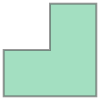

In [19]:

from shapely.ops import cascaded_union
cascaded_union(df['geometry'])[1]

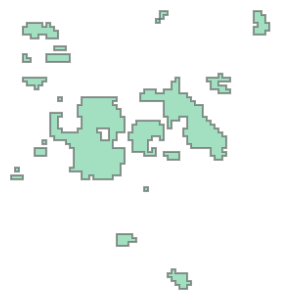

In [29]:
from shapely.wkt import loads

In [30]:
text = """
fill in plygon wkt
"""

In [33]:
wkts = text.strip().split('\n')

In [41]:
import geopandas as gp

In [48]:
%matplotlib inline

In [51]:

import matplotlib.pyplot as plt

In [ ]:
for i in range(10):
    gp.GeoDataFrame([[loads(wkts[i])]],columns=['geometry']).plot()
    plt.savefig('grids-%d.png' % i)

# datetime

In [1]:
import datetime

In [2]:
d1 = datetime.datetime.strptime('2012-01-01', '%Y-%m-%d')

In [3]:
d2 = datetime.datetime.strptime('2012-01-02', '%Y-%m-%d')

In [8]:
(d2-d1).days //2

0

# other stuff

In [1]:
import pandas as pd

In [12]:
df = pd.DataFrame(list(zip([1,2,3], ['a', 'b', 'c'])), columns=['c1', 'c2'])

In [19]:
d = {x['c2']:x[0] for _, x in df.iterrows()}
    

In [23]:
d.get('d', 'undefined')

'undefined'

In [49]:
>>> class Sic: 
...   def __repr__(self): return 'foo'
... 
>>> print(str(Sic()))
>>> print(repr(Sic()))


foo
foo


In [37]:
str(COL)

"<class '__main__.COL'>"

In [38]:
repr(COL)

"<class '__main__.COL'>"

In [31]:
COL.date

'Date'

In [1]:
from src.constants import COL

In [2]:
COL

src.constants.COL

In [3]:
COL??

In [4]:
import datetime

In [6]:
datetime.datetime.strptime('01:03:59', '%H:%M:%S')

datetime.datetime(1900, 1, 1, 1, 3, 59)

# dict keys and set

In [10]:
a = {'a':1, 'b':2}

In [11]:
b = {'a':2, 'd':3, 'c':2}

In [4]:
a.keys() - b.keys()

{'b'}

In [5]:
b.keys() - a.keys()

{'c', 'd'}

In [8]:
','.join(b.keys() - a.keys())

'd,c'

In [9]:
for x in b.keys()&a.keys():
    print(x)

a


In [12]:
a.keys()^b.keys()

{'b', 'c', 'd'}

In [90]:
list(b.values())

[2, 3, 2]

In [14]:
from collections import defaultdict

In [16]:
dd = defaultdict(dict)

In [17]:
dd[1][1]=1

In [19]:
dict(dd)

{1: {1: 1}}

# warning

In [10]:
import warnings

In [13]:
warnings.warn('1')
warnings.warn('2')

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 1
  """Entry point for launching an IPython kernel.
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 2
  


# std, mean

In [60]:
l = [1]*100 + [1,2,3,4,5,6,7,8,9,10]
import pandas as pd

In [63]:
import numpy as np

In [80]:
mean = np.mean(l)
std = np.std(l, ddof=1)

In [81]:
np.digitize(s, [mean, mean+std, mean+std*2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 3], dtype=int64)

In [82]:

def rtm_score(l):
    """

    :param l: array-like numeric data
    :return: array scores digitized by [mean, mean+std, mean+std*2]
    """
    mean = np.mean(l)
    std = np.std(l, ddof=1)
    return np.digitize(l, [mean, mean+std, mean+std*2])

In [84]:
s = pd.Series(l)
new_s = pd.Series(rtm_score(l), index=s.index)

s.index*=2

# dataframe

In [91]:
df = pd.DataFrame({'Name':list('aabbef'),
                   'A':[4,5,4,5,5,4],
                   'B':[7,8,9,4,2,3],
                   'C':[1,3,5,7,1,0]}, columns = ['Name','A','B','C'])

print (df)

  Name  A  B  C
0    a  4  7  1
1    a  5  8  3
2    b  4  9  5
3    b  5  4  7
4    e  5  2  1
5    f  4  3  0


In [92]:

d = dict(tuple(df.groupby('Name')))

In [95]:
dict(df.groupby('Name'))

TypeError: attribute of type 'str' is not callable